# ExtraaLearn Project

```
Kaitlin Cort (kaitlin.zhang@owasp.org)
MIT - Data Science & Machine Learning, Post-Graduate Program
[Module 8] Classification and Hypothesis Testing
March 24, 2024
```



## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To split data into training and testing sets
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn import tree

# For tuning the model
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('ExtraaLearn.csv')
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


# Part 1.
# Data Overview

- Observations
- Sanity checks

In [7]:
# Basic information about the dataset
df.info()

# Summary statistics for numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


### Observations:

* There are **4612 observations and 15 columns** in the dataset.
* All the columns have 4612 non-null values, i.e. **there are no missing values in the data.**

In [8]:
# Check the unique values in each column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

#### Analysis:

* **ID is an identifier** which is unique for each website visitor and **we can drop this column** as it would not add any value to our analysis.

* **Numerical columns:** age, website_visits, time_spent_on_website, page_views_per_visit

* **Categorical columns:** current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status

<br>

----

###### * *Note:*

Status is represented as a numerical integer value (0 or 1), but should be considered a categorical value representing two distinct states: converted to paid customer, or not converted. It is the **target variable** or label that represents a binary outcome: converted (1) or not converted (0).

In [9]:
# Dropping ID column
df = df.drop(['ID'], axis=1)

# Creating numerical columns
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Creating categorical variables
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']

# Part 2.  
# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## A. Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [10]:
# Missing value treatment
df.isnull().sum()

# We already saw in the initial data overview that there is no missing data. This is just to double check.

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

## B. Outlier Detection and Treatment

Using the summary statics from above, we can look for signs that indicate the presence of outliers:

1. A significant difference between the median and mean vlaues, suggesting a skewed distribution

2. A large gap between the 25th or 75th percentile and the max value

#### Age:
* The values range from 18 to 63, with a mean and median that are reasonably close.
* The 25th, 50th, and 75th percentiles also appear consistent
* **Conclusion**: Likely no outlier treatment is needed for `age`.

#### Website Visits:
* The max value (30 visits) is significantly higher than the 75th percentile (5 visits), suggesting a few individuals have an unusually high number of website visits.
* **Conclusion**: Consider outlier treatment for `website_visits`.

#### Time Spent On Websites:
* The maximum time spent (2537 seconds) is far above the 75th percentile (1336.75 seconds), indicating the presence of extreme values.
* The large standard deviation relative to the mean also suggests wide dispersion and potential outliers.
* **Conclusion**: Consider outlier treatment for `time_spent_on_website`.

#### Page Views Per Visit:
* The maximum number of page views per visit (18,434) is considerably higher than the 75th percentile (3.75625), suggesting some visits involve viewing many more pages than typical.
* **Conclusion**: Consider outlier treatment for `page_views_per_visit`.

<br>

----

### 1. Outlier Treatment Methods:
For columns identified for potential outlier treatment (`website_visits`, `time_spent_on_website`, `page_views_per_visit`), we can consider the following outlier treatment methods:

* a. **Trimming (Removing outliers)** - If the outliers do not represent typical behavior or are likely errors (such as a user spending a long time on a website due to not closing down a browser window), we might consider removing these data points. However, we should practice caution so as to avoid losing valuable information.

* b. **Winsorizing** - Capping the extreme values at a certain percentile (e.g. setting all values above the 95th percentile to the value of the 95th percentile) can mitigate the influence of outliers without completely removing them.

* c. **Log Transformation** - Applying a log transformation can reduce the effect of outliers, especially for right-skewed distributions. However, this is more effective when the data spans several orders of magnitude.

<br>

Upon consideration of the applicability and potential impact of these three methods to the three categories we've selected, it seems like winsorizing these three columns may be a good choice.

In [11]:
# Outlier Detection and Treatment:
# Winsorizing outliers

from scipy.stats.mstats import winsorize  # import library from scipy

# Windsorizing 'website_visits'
df['website_visits_winsorized'] = winsorize(df['website_visits'], limits=[0.05, 0.05])

# Windsorizing 'time_spent_on_website'
df['time_spent_on_website_winsorized'] = winsorize(df['time_spent_on_website'], limits=[0.05, 0.05])

# Windsorizing 'page_views_per_visit'
df['page_views_per_visit_winsorized'] = winsorize(df['page_views_per_visit'], limits=[0.05, 0.05])

# The bottom 5% and the top 5% of data will be replaced with the 5th percentile and 95th percentile
# values, respectively.

# Compare the original and Windsorized columns
print(df[['website_visits', 'website_visits_winsorized', 'time_spent_on_website', 'time_spent_on_website_winsorized', 'page_views_per_visit', 'page_views_per_visit_winsorized']].describe())



       website_visits  website_visits_winsorized  time_spent_on_website  \
count     4612.000000                4612.000000            4612.000000   
mean         3.566782                   3.470945             724.011275   
std          2.829134                   2.304188             743.828683   
min          0.000000                   1.000000               0.000000   
25%          2.000000                   2.000000             148.750000   
50%          3.000000                   3.000000             376.000000   
75%          5.000000                   5.000000            1336.750000   
max         30.000000                   9.000000            2537.000000   

       time_spent_on_website_winsorized  page_views_per_visit  \
count                       4612.000000           4612.000000   
mean                         718.539029              3.026126   
std                          732.021181              1.968125   
min                            1.000000              0.000000   

## C. Preparing Numeric Data for Modeling

For logistic regression or support vector machines, it would be good to scale certain numerical data columns to help in converging faster.

These columns include: `website_visits`, `time_spent_on_website`, and `page_views_per_visit`

       website_visits_winsorized_scaled  \
count                      4.612000e+03   
mean                      -4.313789e-17   
std                        1.000108e+00   
min                       -1.072488e+00   
25%                       -6.384482e-01   
50%                       -2.044088e-01   
75%                        6.636699e-01   
max                        2.399827e+00   

       time_spent_on_website_winsorized_scaled  \
count                             4.612000e+03   
mean                              8.550547e-17   
std                               1.000108e+00   
min                              -9.803225e-01   
25%                              -7.784622e-01   
50%                              -4.679867e-01   
75%                               8.446176e-01   
max                               2.037677e+00   

       page_views_per_visit_winsorized_scaled  
count                            4.612000e+03  
mean                            -9.397898e-17  
std              

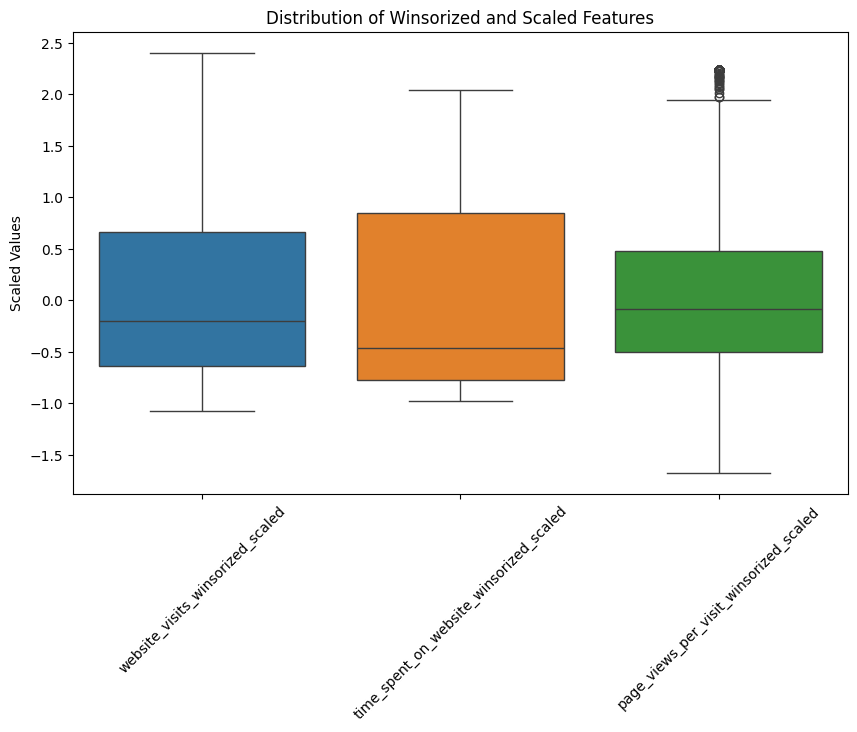

In [12]:
scaler = StandardScaler()

columns_to_scale = ['website_visits_winsorized', 'time_spent_on_website_winsorized', 'page_views_per_visit_winsorized']

# Fit the scaler to the winsorized data and transform it, saving the results in new columns
for column in columns_to_scale:
    # Scale the winsorized column
    scaled_data = scaler.fit_transform(df[[column]])

    # Save the scaled data in a new column, non-destructively
    df[column + '_scaled'] = scaled_data

# Print summary statistics of the newly scaled columns
print(df[['website_visits_winsorized_scaled', 'time_spent_on_website_winsorized_scaled', 'page_views_per_visit_winsorized_scaled']].describe())

# Plot box plots for visual inspection, which highlights the central tendency, dispersion, and potential outliers
data_to_plot = df[['website_visits_winsorized_scaled', 'time_spent_on_website_winsorized_scaled', 'page_views_per_visit_winsorized_scaled']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot)
plt.title('Distribution of Winsorized and Scaled Features')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45) # for readability
plt.show()

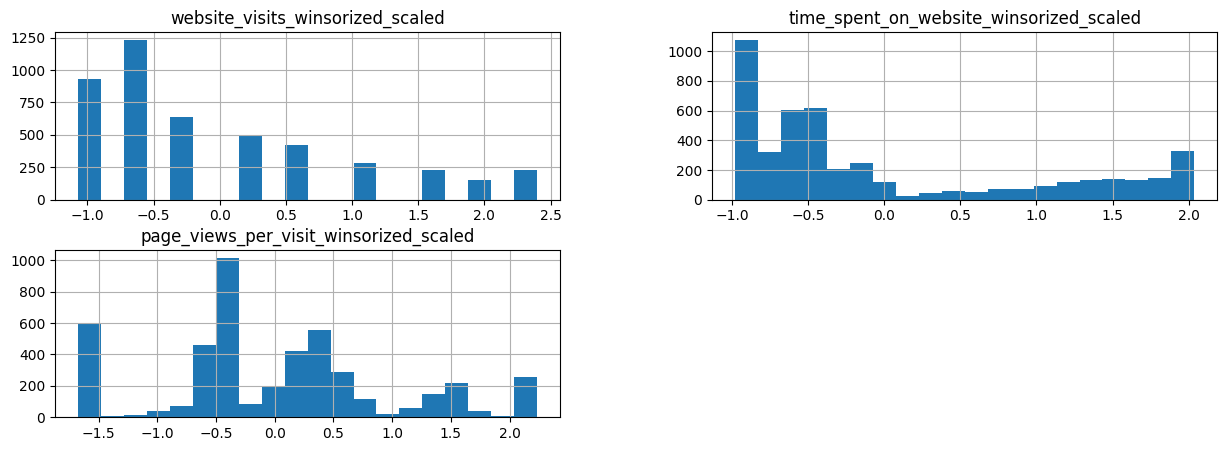

In [13]:
# Plot histograms of winsorized and scaled data, for a more intuitive and detailed view
df[['website_visits_winsorized_scaled', 'time_spent_on_website_winsorized_scaled', 'page_views_per_visit_winsorized_scaled']].hist(bins=20, figsize=(15, 5))
plt.show()

## D. Preparing Categorical Data for Modeling

Data preprocessing is required for categorical variables.This is because scikit-learn does not support categorical variables for decision tree models. Using One-Hot Encoding, Ordinal Encoding, or Binary Encoding is necessary when using sci-kit learn.

* **One-Hot Encoding**: best for nominal variables where no ordinal relationship exists, creating a binary column for each category level.
  * `current_occupation`, `first_interaction`, and `last_activity`

* **Ordinal Encoding**: best for preserving the order of categories.
  * `profile_completed` since it has an order (Low < Medium < High)

* **Binary Encoding**: best for yes/no categories.
  * `print_media_type1`, `print_media_type2`, `digital_media`, `educational_channels`, and `referral`

In [14]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['current_occupation', 'first_interaction', 'last_activity'])

# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories = [['Low', 'Medium', 'High']]) # initialize the OrdinalEncoder with specified categories
df_encoded['profile_completed'] = encoder.fit_transform(df[['profile_completed']]) # apply Ordinal Encoding to 'profile_completed' in the original df and assign it to df_encoded

# Binary Encoding
binary_features = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for feature in binary_features:
    df_encoded[feature] = df[feature].map({'Yes': 1, 'No': 0})

print(df_encoded.dtypes)

age                                          int64
profile_completed                          float64
website_visits                               int64
time_spent_on_website                        int64
page_views_per_visit                       float64
print_media_type1                            int64
print_media_type2                            int64
digital_media                                int64
educational_channels                         int64
referral                                     int64
status                                       int64
website_visits_winsorized                    int64
time_spent_on_website_winsorized             int64
page_views_per_visit_winsorized            float64
website_visits_winsorized_scaled           float64
time_spent_on_website_winsorized_scaled    float64
page_views_per_visit_winsorized_scaled     float64
current_occupation_Professional              uint8
current_occupation_Student                   uint8
current_occupation_Unemployed  

## E. Initial Feature Engineering

We can create some new features that could be predictive of lead conversion.

The impact of these features will be more clear to us after conducting further Exploratory Data Analysis.

In [16]:
# 1. Interaction Intensity:
# Combining time spent on website and page views, to capture both
# depth and breadth of a lead's engagement.

df_encoded['interaction_intensity'] = df['time_spent_on_website'] * df['page_views_per_visit']

# 2. Media Exposure Score:
# Summing all forms of media and educational channels to show a lead's combined exposure
# to various media, assuming equal weight of all channels. After EDA, we may want to
# apply weights to each channel if some are more influential than others in predicting conversion.

df_encoded['media_exposure_score'] = (df_encoded['print_media_type1'] + df_encoded['print_media_type2'] + df_encoded['digital_media'] + df_encoded['educational_channels'])

<br>
<br>

# Part 3.

# EDA

- It is a good idea to explore the data once again after manipulating it.

<br>

## A. Univariate Analysis for Numeric Variables

In [17]:
# Univariate analysis of numerical columns

# checking summary statistics of original data
df[num_cols].describe().T

# .T transposes the DataFrame for better readability

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


### 1. Observations on Original Data

##### a. Age
* The age of individuals in the dataset ranges from 18 to 63, indicating a wide range of age groups from young adults to seniors.
* The mean age is approximately 46 years, with a median of 51 years. Since the median is higher than the mean, this suggests a slight left-skew in age distribution, with more individuals over the median age.
* The standard deviation of approximately 13 years indicates a moderate spread in the age data around the mean.

##### b. Website Visits
* On average, individuals visit the website approximately 3.57 times, with a standard deviation of 2.83 visits.
* The number of website visits ranges from 0 to 30, with most individuals visiting the website between 2 and 5 times.
* There is a right-skewed distribution, with a few individuals having a very high number of webiste visits (up to 30).

##### c. Time Spent on Website
* The average time spent on the website is approximately 724 seconds (or 12 minutes), with a standard deviation of 743.83 seconds.
* The time spent on the website varies widely, ranging from 0 to 2537 seconds (or approximately 42 minutes).
* The distribution is right-skewed, with most individuals spending relatively little time on the website (25th percentile at 148.75 seconds), but some spending significantly more time (up to 2537 seconds).

##### d. Page Views per Visit
* On average, individuals view approximately 3.03 pages per visit, with a standard deviation of 1.97 pages.
* The number of page views per visit ranges from 0 to 1843, with most individuals viewing between 2 and 4 pages per visit.
* Similar to website visits and time spent on the website, the distribution appears to be right-skewed, with some individuals viewing a much higher number of pages per visit.

In [18]:
# checking summary statistics of winsorized data
df[['website_visits_winsorized', 'time_spent_on_website_winsorized', 'page_views_per_visit_winsorized']].describe().T

,count,mean,std,min,25%,50%,75%,max
website_visits_winsorized,4612.0,3.470945,2.304188,1.000,2.00000,3.000,5.00000,9.000
time_spent_on_website_winsorized,4612.0,718.539029,732.021181,1.000,148.75000,376.000,1336.75000,2210.000
page_views_per_visit_winsorized,4612.0,2.945370,1.708175,0.082,2.07775,2.792,3.75625,6.765


### 2. Observations on Winsorized Data

##### a. Website Visits (Winsorized)
* The average number of website visits after winsorizing is approximately 3.47 with a standard deviation of 2.30. This remains pretty close to the original data.
* The range of website visits is now between 1 and 9, with the majority of individuals still having between 2 and 5 visits.
* Windsorizing has slightly reduced the mean and standard deviation compared to the original data, indicating a reduction in the influence of extreme values. However, the overall distribution remains similar.

##### b. Time Spent on Website (Winsorized)
* The average time spent on the website after winsorizing is approximately 718.54 seconds (or 11.98 minutes), with a standard deviation of 732.02 seconds. This is a slight decrease from the previous average of 12 minutes and 743.83 seconds standard deviation.
*  The time spent on the website now ranges from 1 to 2210 seconds (or approximately 36.83 minutes), down from 42 minutes, with most individuals spending between 148.75 and 1336.75 seconds on the website.
*  Winsorizing has reduced the maximum value and slightly affected the mean and standard deviation, but the distribution remains right-skewed with a wide range of values.

##### c. Page Views per Visit (Winsorized)
* The average number of page views per visit after winsorizing is approximately 2.95 (down from 3.03), with a standard deviation of 1.71.
* The range of page views per visit is between 0.082 and 6.765, with most individuals having between 2 and 4 page views per visit (same as before).
* Winsorizing has reduced the maximum value and slightly affected the mean and standard deviation, but the overall distribution remains similar to the original data.

Overall, winsorizing has mitigated the influence of extreme values in the data, resulting in a more stable mean and standard deviation for each variable. However, the overall distribution and patterns remain largely unchanged, indicating that the winsorizing process has effectively addressed outliers while preserving the essential characteristics of the data.

In [19]:
# checking summary statstics of winsorized and scaled data
df[['website_visits_winsorized_scaled', 'time_spent_on_website_winsorized_scaled', 'page_views_per_visit_winsorized_scaled']].describe().T

,count,mean,std,min,25%,50%,75%,max
website_visits_winsorized_scaled,4612.0,-4.313789e-17,1.000108,-1.072488,-0.638448,-0.204409,0.663670,2.399827
time_spent_on_website_winsorized_scaled,4612.0,8.550547e-17,1.000108,-0.980322,-0.778462,-0.467987,0.844618,2.037677
page_views_per_visit_winsorized_scaled,4612.0,-9.397898e-17,1.000108,-1.676457,-0.507978,-0.089796,0.474757,2.236331


### 3. Observations on Scaled and Winsorized Data

* For all scaled data columns, the mean is approximately zero, indicating that the data has been centered around the mean.
* The standard deviation is approximately 1, indicating that the data has been scaled to have unit variance.
* For each scaled column, the distribution appears to be symmetric, as the mean and median are close in value.

This scaling allows for easier comparison and interpreation. The symmetric distributions suggest that the scaling process has effectively normalized the data while preserving its essential characteristics.

## B. Univariate Analysis for Categorical Variables

In [20]:
# Printing the % sub categories of each category
for i in cat_cols:
  print(df[i].value_counts(normalize=True))
  print('*'*40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

### Observations

##### 1. Current Occupation:
* Most individuals in the dataset have a professional occupation, accounting for approximately 56.7% of thte total.
* A smaller proportion of individuals are unemployed (31.2%), while students make up the smallest group (12.0%).
* This may be due to the fact that students who are already studying in another program are not as likely to be interested in this educational program.

##### 2. First Interaction:
* The majority of leads had their first interaction with the company through the website, representing around 55.1% of the total.
* A smaller proportion first interacted through the mobile app, accounting for approximately 44.9% of the total.
* Both the website and the mobile app are fairly balanced balanced in terms of being the first source of interaction for a new lead. However, it is somewhat more common for a lead to have interacted with the website first, before the mobile app.

##### 3. Profile Completed:
* Nearly half of the leads have completed their profiles to a high extent, with approximately 49.1% having a high completion rate.
* A similar proportion have medium completion rates (48.6%), while only a small percentage have low completion rates (2.3%).
* The vast majority of visitors are willing to fill out their profiles, at least to a partial degree.

##### 4. Last Activity:
* The most common type of last activity is email activity, with approximately 49.4% of leads having engaged through email. Most interested users seem to reach out by email for inquiries.
* Phone activity is next most common, accounting for 26.8% of the total, followed by website (form) activity at approximately 23.9%.


##### 5. Print Media Type 1:
* The majority of leads have not seen the company's advertisement in print media type 1, with approximately 89.2% responding "No".

##### 6. Print Media Type 2:
* A similar pattern is observed for print media type 2, where approximately 94.9% of leads have not seen the advertisement.
* This shows that print advertisements are not a good investment for the company in terms of lead generation.

##### 7. Digital Media:
* The majority of leads have not seen the company's advertisement on digital platforms either, with approximately 88.6% responding "No".

##### 8. Educational Channels:
* A similar pattern is observed for educational channels, where approximately 84.7% of leads have not heard about the company through education channels.

##### 9. Referral:
* The vast majority fo leads have not heard about the company through referral, with approximately 97.9% responding "No."

##### 10. Status:
* In terms of status, approximately 70.1% of leads have not converted to paid customers, while around 29.9% have converted.

* Now we can dig into the data to better understand patterns for the 29.9% of converted customers.

## C. Bivariate and Multivariate Analysis

We have analyzed different categorical and numerical variables. Let's now check how conversion status is related to other categorical variables.

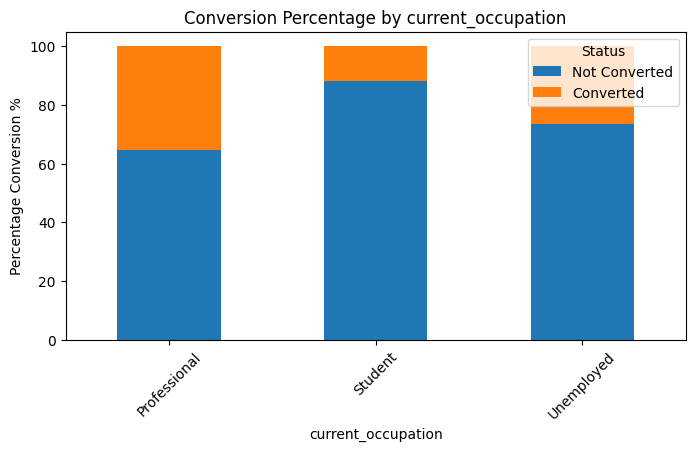

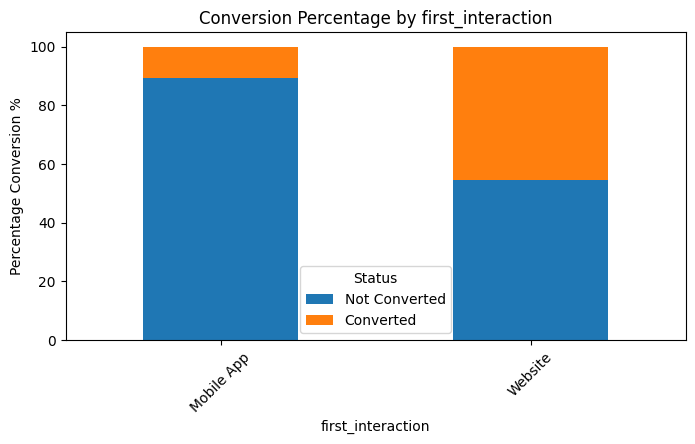

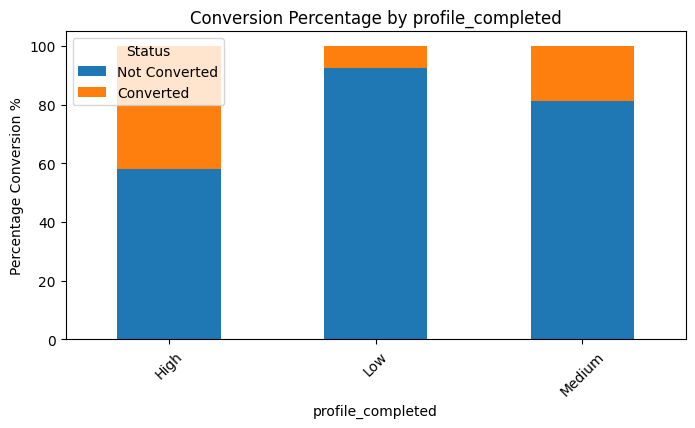

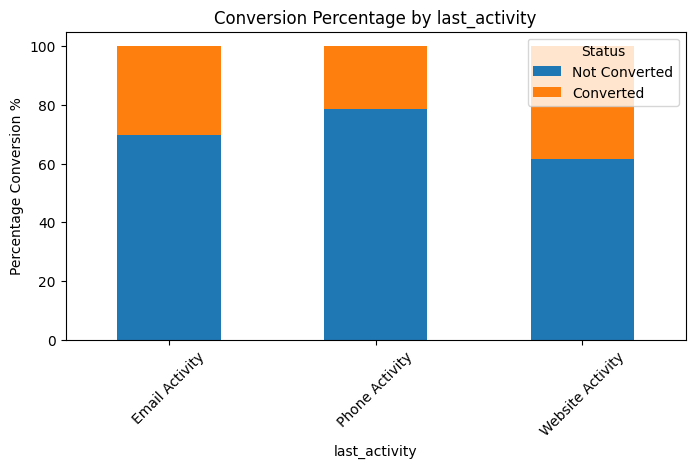

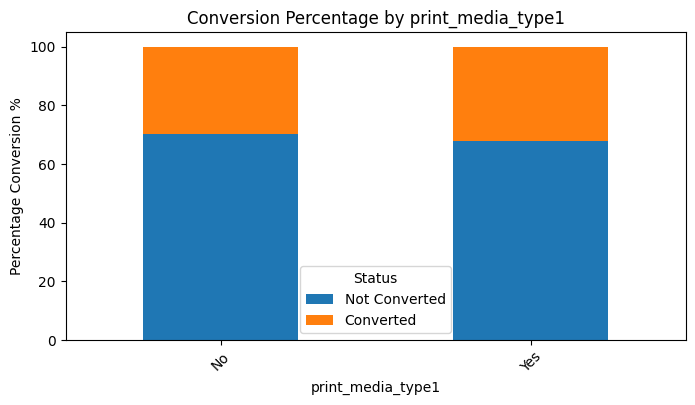

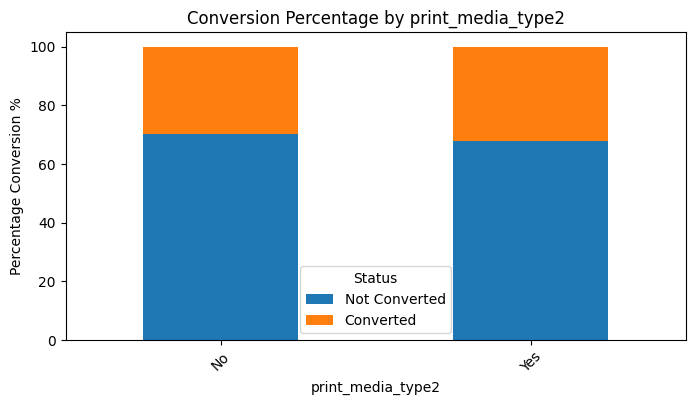

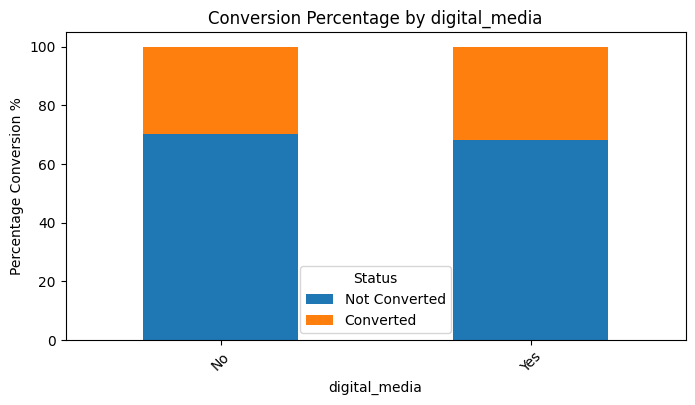

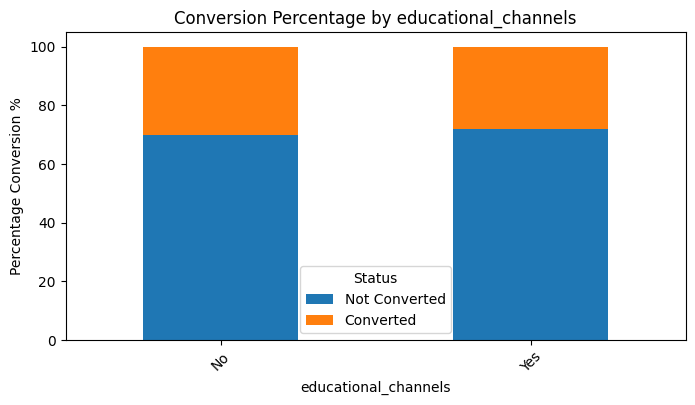

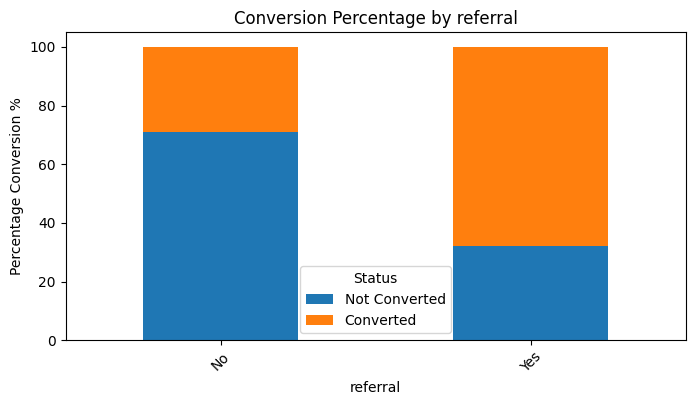

In [21]:
for i in cat_cols:
    if i != 'status':
        crosstab_df = pd.crosstab(df[i], df['status'], normalize='index') * 100
        crosstab_df.plot(kind='bar', figsize=(8, 4), stacked=True)
        plt.ylabel('Percentage Conversion %')
        plt.xlabel(i)
        plt.title(f'Conversion Percentage by {i}')
        plt.xticks(rotation=45)
        plt.legend(['Not Converted', 'Converted'], title='Status')
        plt.show()

### 1. Observations:

* Professionals have a higher level of conversion than unemployed individuals. Students have the lowest level of conversion.

* Leads who first interacted with the company through the website have a significantly higher rate of conversion than those who first interacted with the company through the mobile app.

* The more complete a profile is, the more likely the lead is to convert to a paid customer, demonstrating more interest and commitment to the educational platform.

* Leads who reach out through the website are most likely to convert, followed by leads who reach out through email. This is surprising because there are fewer leads who reach out by website than by email. Leads who reach out by phone are least likely to convert, suggesting the company may benefit from improving its phone-based customer service.

* There is a similarly low conversion rate for both print media types and digital media advertisements, as well as educational channels.

* There is a significantly higher conversion rate among leads who came to the company by referral.

<br/>

----

Now let's check the relationship between conversion status and numerical variables.

In [22]:
# Mean of numerical variables grouped by conversion status
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


### 2. Observations:

##### a. Age:
* The average age of converted leads is somewhat higher (48.66) compared to that of non-converted leads (45.15).
* This suggests that older individuals might be more likely to convert to paid customers compared to younger ones, though the difference in age is not very significant.

##### b. Website Visits:
* The average number of website visits for converted leads (3.54) is slightly lower compared to not converted leads (3.58).
* This indicates that the number of website visits may not have a significant impact on lead conversion.

##### c. Time Spent on Website:
* The average time spent on the website by converted leads (1068.40 seconds) is substantially higher compared to non-converted leads (577.42 seconds).
* This suggests that individuals who spend more time on the website are much more likely to convert into paid customers.

##### d. Page Views per Visit:
* The average number of page views per visit for converted leads (3.03) is nearly identical to that of non-converted leads (3.03).
* This indicates that the number of page views per visit may not be a strong predictor of lead conversion.

Overall, these observations suggest that time spent on the website could be a good predictor for likeliness to convert to a paid customer. Further analysis via machine learning modeling would be necessary to confirm these observations and identify additional factors influencing lead conversion.

In [23]:
# Mean of winsorized numerical variables grouped by conversion status
winsorized_num_cols = ['website_visits_winsorized', 'time_spent_on_website_winsorized', 'page_views_per_visit_winsorized']
df.groupby('status')[winsorized_num_cols].mean()

,website_visits_winsorized,time_spent_on_website_winsorized,page_views_per_visit_winsorized
status,,,
0,3.485935,573.456260,2.942904
1,3.435730,1059.383442,2.951164


### 3. Observations on Winsorized Numeric Variables:

* Winsorized data reveal the same comparative patterns as the original data, showing that website visits and page views per visit are not significant differentiating factors for lead conversion.
* Time spent on the website is still substantially higher for converted leads than for non-converted leads, even in the winsorized data, which accounts for outliers. This confirms that this is a significant factor to pay attention to in subsequent machine learning models.

In [24]:
# Mean of scaled winsorized numerical variables grouped by conversion status
scaled_winsorized_num_cols = ['website_visits_winsorized_scaled', 'time_spent_on_website_winsorized_scaled', 'page_views_per_visit_winsorized_scaled']
df.groupby('status')[scaled_winsorized_num_cols].mean()

,website_visits_winsorized_scaled,time_spent_on_website_winsorized_scaled,page_views_per_visit_winsorized_scaled
status,,,
0,0.006506,-0.198216,-0.001444
1,-0.015285,0.465671,0.003392


### 4. Observations on Scaled Winsorized Numeric Variables:

##### a. Website Visits (Scaled)
* The mean scaled value of website visits for converted leads is slightly negative (-0.015), indicating that on average, converted leads have slightly fewer website visits compared to the overall mean.
* For non-converted leads, the mean scaled value of website visits is slightly positive (0.007), indicating counter-intuitively that more website visits by a lead does not equate to higher likelihood to convert to a paid customer.

##### b. Time Spent On Website (Scaled)
* The mean scaled value of time spent on website for converted leads is positive (0.466), indicating that on average, converted leads spend more time on the website compared to the overall mean.
* For non-converted leads, the mean scaled value of time spent on the website is negative (-0.198).

##### c. Page Views per Visit (Scaled)
* The mean scaled value of page views per visit for converted leads is slightly positive (0.003), indicating that on average, converted leads have slightly more page views per visit compared to the overall mean.
* For non-converted leads, the mean scaled value of page views is slightly negative (-0.001), indicating that page views is not a very significant factor in lead conversion.

These scaled observations provide a clearer way of demonstrating the impact of each of these numerical variables on lead conversion. By scaling, it is easier to see that `website_visits` and `page_views_per_visit` are not strong predictors of lead conversion on their own, but `time_spent_on_website` is a better indicator.


</br>

-----

### D. Now let's check the relationship between different numerical variables.

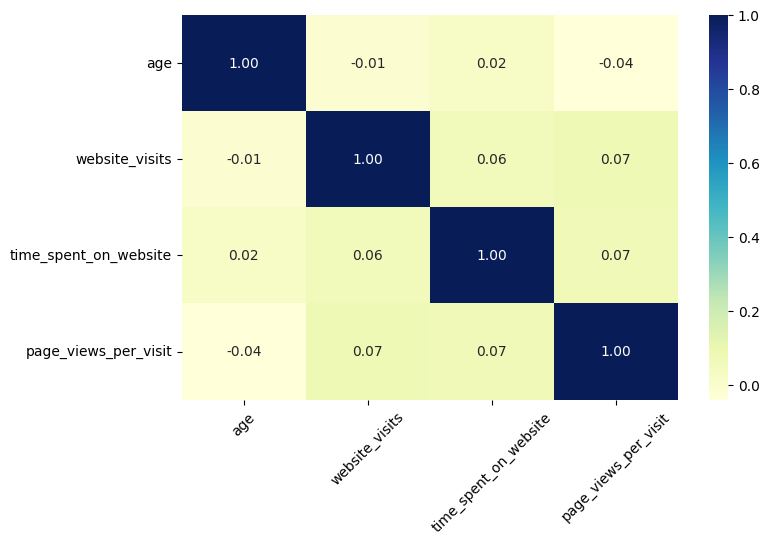

In [25]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)  # rotate x-axis labels
plt.show()

### Observations:

* In terms of positive correlations, `website_visits` and `page_views_per_visit` have a weak positive correlation (0.07). Similarly, `time_spent_on_website` and `page_views_per_visit` have a weak positive correlation (0.07). There is a slightly lower positive correlation between `website_visits` and `time_spent_on_websites` (0.06).

* There is a weak negative correlation between `age` and `page_views_per_visit` (-0.04).

* There is a very weak positive correlation between `age` and `time_spent_on_website` (0.02) and an even smaller negative correlation between `age` and `website_visits`.

* None of the correlations between these numerical variables are particularly strong or significant.

</br>

----

##### Now we have explored the data. Let's finally start building the model!


# Part 4.
# Building a Decision Tree model

In [26]:
# Define features (X) and target variable (Y)
X = df_encoded.drop(columns=['status']) # Features
y = df_encoded['status'] # Target variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 30% of the data is for testing to evaluate the model's performance on unseen data.
# The remaining 70% of the data will be used for training.
# A random seed of 42 is used for reproducibility. This ensures that the data split
# will be the same every time I run the code.

clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8092485549132948


## A. Do we need to prune the tree?

To evaluate whether the decision tree model is overfitting or underfitting, I need to look beyond the accuracy metric and compare the accuracy of the training set and the testing set.

A significant difference between training and testing accuracy can indicate overfitting or underfitting:

* **Overfitting**: If the training accuracy is significantly higher than the testing accuracy.
* **Underfitting**: If both training and testing accuracies are low, or if the testing accuracy is higher than the training accuracy.

In [27]:
# Check training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Check testing accuracy (already calculated)
print("Testing Accuracy:", accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8092485549132948


Another way to evaluate whether my model is overfitting or underfitting is to use cross-validation.

* **Cross-validation** provides a more robust estimate of the model's performance by training and evaluating the model on multiple splits of the data.

In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print average cross-validation score
print("Average CV Score:", np.mean(cv_scores))

Average CV Score: 0.8039889260475249


* In addition to cross-validation, we can also look at additional model evaluation metrics, including **precision, recall, F1 score**, and the **confusion matrix**.

* We can also use **ROC Curve** and **AUC** to evaluate the model's ability to distinguish between classes. A model that overfits might have an excellent AUC on the training set but a much lower AUC on the test set.

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       977
           1       0.67      0.69      0.68       407

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384

Confusion Matrix:
 [[841 136]
 [128 279]]
ROC AUC: 0.7731510239186801


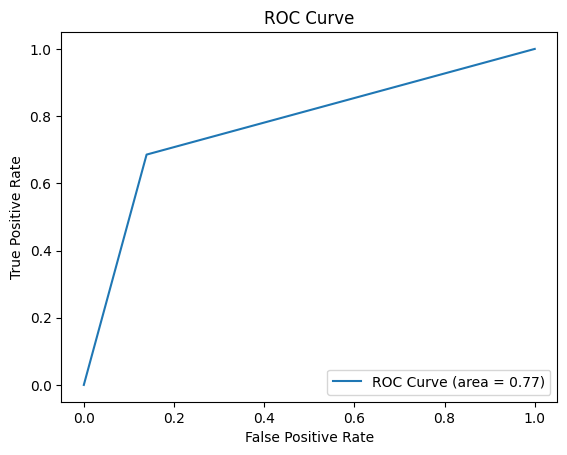

In [29]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve and
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = clf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Observations:

#### 1. Precision and Recall:
* For the non-converted class (0), both precision and recall are relatively high (0.87), suggesting that the model is quite good at identifying and predicting the non-conversion cases.
* For the converted class (1), precision and recall are both 0.68, which is lower than the non-converted class but still indicates a reasonable performance.
* The equal values of precision and recall suggest that the model balances the proportion of actual positives correctly identified (recall) with the proportion of positive identifications that were actually correct (precision) for the converted class.

#### 2. Accuracy:
* The training accuracy of 1.0 (or 100%) alongside a testing accuracy of approximately 81% is a classic indication of overfitting.
* It means the model has memorized the training data, including its noise and peculiarities, rather than learning the underlying patterns necessary to generalize to unseen data.
* The drop in accuracy when the model is applied to the test set indicates that it doesn't perform as well on new, unseen data. This performance gap between training and testing suggests that the model's complexity is too high, allowing it to capture details in the training data that don't apply more broadly, and hence failing to generalize well.


#### 3. Confusion Matrix:
* The confusion matrix shows that the model made 847 true negative predictions and 275 true positive predictions. It incorrectly predicted 130 false positives and 132 false negatives.
* The relatively balanced distribution of errors (false positives and false negatives) suggests the model doesn't heavily favor one class over the other.


<br>

------


### Result: Yes, the model is Overfitting
To mitigate overfitting and improve the model's generalization to unseen data, I can do one or many the following:

<br>

#### 1. **Prune the Tree:**
  * Limit the depth of the tree with `max_depth`
  * Set a minimum number of samples required to split an internal node with `min_samples_split`
  * Set a minimum number of samples required to be at a leaf node with `min_samples_leaf`

#### 2. **Feature Selection:**
* Reduce the number of features used by the model, especially if some features are noisy or irrelevant.

#### 3. **Ensemble Methods:**
* Use **Random Forests** or **Gradient Boosting** to reduce overfitting by averaging multiple decision trees' predictions, each built on different subsets of data and/or features.

<br>

-----

<br>

# B. Pruning the Tree

I can either prune the tree during its construction (pre-pruning) or after it's fully grown (post-pruning). It is more common to implement pre-pruning with scikit-learn.

In [30]:
# Initialize the decision tree classifier with pruning parameters
clf_pruned = DecisionTreeClassifier(random_state=42,
                                    max_depth=4,
                                    min_samples_split=50,
                                    min_samples_leaf=25)

# Train the pruned decision tree classifier
clf_pruned.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_pruned = clf_pruned.predict(X_test)

# Evaluate the pruned model
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

# Check training accuracy
y_train_pred = clf_pruned.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy after pruning:", train_accuracy)

# Check testing accuracy (already calculated)
print("Testing Accuracy after pruning:", accuracy_pruned)

Training Accuracy after pruning: 0.8547087980173482
Testing Accuracy after pruning: 0.851878612716763


### Observations:

* The accuracy of the model after pruning (0.851878612716763) is higher than the accuracy of the model before pruning (0.8106936416184971).

* This indicates that pruning was beneficial for my decision tree model, and has likely helped in reducing overfitting and improved model generalization. It shows that the pruned model is closer to the optimal complexity for my dataset.

* The closeness of the training and testing accuracy scores suggest that the model has achieved a good balance between bias and variance, minimizing overfitting. This balance is crucial for building models that perform well on unseen data.

* The closeness between training accuracy (0.8547087980173482) and testing accuracy (0.851878612716763) after pruning suggests that the pruning as effectively improved the model's ability to generalize to new data.

We can further evaluate the impact of pruning on our model's performance with cross-validation and investigating the features deemed most important by the pruned model.

In [32]:
# Perform cross-validation
cv_scores = cross_val_score(clf_pruned, X, y, cv=5)  # cv=5 for 5-fold cross-validation

# Print average cross-validation score
print("Average CV Score:", cv_scores.mean())
print("CV Score Standard Deviation:", cv_scores.std())


Average CV Score: 0.8451886355677868
CV Score Standard Deviation: 0.008559887757727177


* The cross-validation results provide a strong indication of the model's performance and stability.

* **Average CV Score:** 0.8452
  * **Good Generalization:** - An average CV score of approximately 84.5% is quite good and suggests that the model generalizes well to unseen data. It aligns closely with the testing accuracy of 85.2%, reinforcing the idea that the model is not overfitting significantly to the training data.
  * **Model Reliability:** -  The score also suggests that the pruning adjustments have effectively balanced the model's complexity with its predictive power, making it a more reliable model for making predictions.

* **CV Score Standard Deviation:** 0.0086
  * **Model Stability** - The low standard deviation in cross-validation scores (less than 1%) indicates that the model's performance is stable across different subsets of the data. A low variance in cross-validation scores is desirable as it suggests that the model's performance is not heavily dependent on the particular samples chosen for training and testing.
  * **Consistency** - This level of consistency in model performance across 5 different folds is a positive sign, indicating that the model should perform similarly well on new, unseen data, assuming it comes from the same distribution as the current dataset.

  </br>

  -----

### C. Feature Importance
We can further improve the model by investigating which features are most influential in making predictions.

age: 0.00046566916164052273
profile_completed: 0.2116260253439329
website_visits: 0.0
time_spent_on_website: 0.05228519911041165
page_views_per_visit: 0.0
print_media_type1: 0.0
print_media_type2: 0.0
digital_media: 0.0
educational_channels: 0.0
referral: 0.0
website_visits_winsorized: 0.0
time_spent_on_website_winsorized: 0.0
page_views_per_visit_winsorized: 0.0016708440518959844
website_visits_winsorized_scaled: 0.0
time_spent_on_website_winsorized_scaled: 0.24555904551526594
page_views_per_visit_winsorized_scaled: 0.0
current_occupation_Professional: 0.11737410028827813
current_occupation_Student: 0.0
current_occupation_Unemployed: 0.004278214747507095
first_interaction_Mobile App: 0.0
first_interaction_Website: 0.2846240708643902
last_activity_Email Activity: 0.0005945100948894971
last_activity_Phone Activity: 0.05968011050459969
last_activity_Website Activity: 0.02184221031718841
interaction_intensity: 0.0
media_exposure_score: 0.0


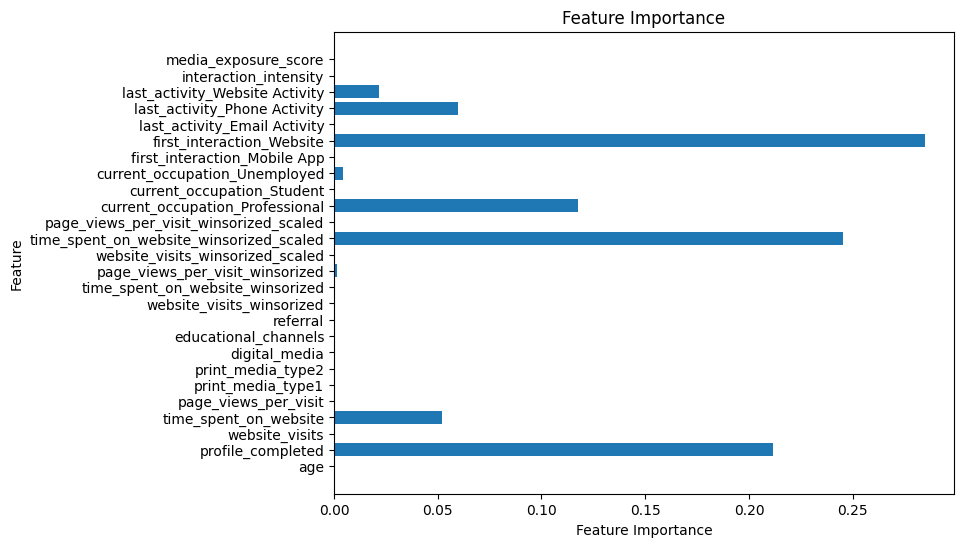

In [33]:
# Fit the pruned model to the entire dataset
clf_pruned.fit(X, y)

# Get feature importance
feature_importances = clf_pruned.feature_importances_

# Print the name and importance of each feature
features = X.columns
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")

# Visual comparison:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Observations:

* **Dominant Features**
  * The features with the highest importance scores are `profile_completed`, `time_spent_on_website_winsorized` and `first_interaction_Mobile App1, with importance scores of  0.2116, 0.2978, and 0.2846, respectively. This suggests that these features are the most important predictors of conversion status.
  * That means that how complete a profile is, the time spent on the website, and whether the first interaction was through a mobile app are the most critical factors in predicting the likelihood that a lead will convert to a paying customer.

* **Non-contributing Features**
  * Several features have an importance score of 0.0, indicating that they do not contribute at all to the model's decision-making process.
  * These include: `website_visits`, `time_spent_on_website`, `digital_media`, `print_media` (types 1 and 2), `educational_channels`, the overall media exposure score and interaction intensity (combined features I engineered), `referral`, and the occupational status of being a student.

* **Minimal Influence Features**
  * Features like `age` and the `last_activity: email` have very low importance scores close to 0. These features also have minimal influence on the model's predictions.

</br>

-----

### Analysis:

* These results can inform feature engineering and selection efforts. Features with low or zero importance can be removed or transformed in the next iteration of the model. We can explore if removing some of these features might simplify the model without compromising performance, leading to a more efficient and interpretable model.

* We can also further explore why `profile_completed`, `time_spent_on_website_winsorized` and `first_interaction_Mobile` are so influential. Understanding the underlying reasons can provide actional insights.

* We can also continue experimenting with feature engineering to create new features that could capture more relevant information or more effectively distinguish between classes.

<br>

## D. Building and Evaluating a More Simplified Model

We've identified the following features to remove:
* `website_visits`
* `time_spent_on_website`
* `page_views_per_visit`
* `print_media_type1`, `print_media_type2`, `digital_media`, `educational_channels`
* `referral`
* `interaction_intensity`, `media_exposure_score` (my initial attempts at feature engineering)
* `current_occupation_Student`
* `first_interaction_Website`

</br>

Now let's create a simplified model:

In [34]:
# Features to keep based on importance
features_to_keep = [
    'profile_completed',
    'time_spent_on_website_winsorized',
    'first_interaction_Mobile App',
    'current_occupation_Professional',
    'current_occupation_Unemployed',
    'last_activity_Email Activity',
    'last_activity_Phone Activity',
    'last_activity_Website Activity',
    'age',  # Although low, included for completeness
    'page_views_per_visit_winsorized_scaled'  # Although low, included for completeness
]

# Create a new DataFrame with selected features
X_simplified = df_encoded[features_to_keep]
y_simplified = df_encoded['status']

# Split the data into training and testing sets
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(X_simplified, y_simplified, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier on simplified dataset
clf_simplified = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # Using previously identified optimal ccp_alpha
clf_simplified.fit(X_train_simplified, y_train_simplified)

# Evaluate the simplified model
y_pred_simplified = clf_simplified.predict(X_test_simplified)
accuracy_simplified = accuracy_score(y_test_simplified, y_pred_simplified)

# Check training accuracy
y_train_pred_simplified = clf_simplified.predict(X_train_simplified)
train_simplified_accuracy = accuracy_score(y_train_simplified, y_train_pred_simplified)
print("Training Accuracy after simplification:", train_simplified_accuracy)

# Check testing accuracy
print("Testing Accuracy after simplification:", accuracy_simplified)

Training Accuracy after simplification: 0.8413878562577447
Testing Accuracy after simplification: 0.8388728323699421


## Observations:

##### Before Simplification (After Pruning)
* Training Accuracy: 0.8547
* Testing Accuracy: 0.8519

##### After Simplification
* Training Accuracy: 0.8414
* Testing Accuracy: 0.8389

------
<br>

#### 1. **Performance Drop:**
* After simplification, both the training and testing accuracy slightly decreased (by approximately 1.3% for training and 1.3% for testing). This reduction in accuracy is relatively minor and could be considered an acceptable trade-off for a more interpretable and potentially more generalizable model.

* A simplified model can also lead to faster training and prediction times due to the reduced complexity, which is an improvement on model performance.

<br>

#### 2. **Overfitting Reduction:**
The gap between training and testing accuracy has slightly decreased after simplification, suggesting that the simplified model could be less prone to overfitting compared to the model before simplification. This is because a simpler model with fewer features is generally less likely to capture noise in the training data.

<br>

#### 3. **Interpretability Improvement:**
Reducing the number of features in the model significantly improves its interpretability, making it easier to understand, explain, and maintain. This can result in better actionable insights.

<br>

#### 4. **Further Tuning:**
* It's possible that further pruning and iterative tuning of hyperparameters such as `max_depth`, `min_samples_split`, etc. could be beneficial to optimize performance.
* Selectively adding back some features or exploring feature engineering could be beneficial to see if performance can be improved without significantly increasing complexity.
* Exploring other models, such as ensemble methods like Random Forests below, might also yield improvements in accuracy, and more robust performance, without necessarily increasing model complexity.

-----

<br>

### Analysis:

Overall, the slight decrease in performance after simplification indicates a successful balance between maintaining accuracy and achieving a simpler, more interpretable model. This balance is crucial for practical applications where explainability and ease of maintenance are important.

Whether the change in performance is significant depends on the context of this business problem. For some applications, a 1.3% decrease in accuracy might be negligeable, especially if model simplicity and interpretability are prioritized. For other cases, where the highest accuracy is critical, even a small decrease can be significant, and lead to revenue loss.

Consulting with managers and domain experts in the business and considering the cost-benefit tradeoffs of model complexity versus performance would help in deciding whether to use this simplified model or the prior pruned model.

<br>


# Part 5.
# Building a Random Forest model

Let's see if implementing an ensemble method would improve the simplified model's accuracy without increasing model complexity.

In [35]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # setting the number of trees to 100 as a reasonable starting point

# Train the classifier
rf_clf.fit(X_train_simplified, y_train_simplified)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test_simplified)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test_simplified, y_pred_rf)
print("Random Forest model accuracy:", accuracy_rf)
y_train_pred_rf = rf_clf.predict(X_train_simplified)  # training set accuracy
training_accuracy_rf = accuracy_score(y_train_simplified, y_train_pred_rf)
print("Training Accuracy of Random Forest model:", training_accuracy_rf)
y_test_pred_rf = rf_clf.predict(X_test_simplified)  # testing set accuracy
testing_accuracy_rf = accuracy_score(y_test_simplified, y_test_pred_rf)
print("Testing Accuracy of Random Forest model:", testing_accuracy_rf)

Random Forest model accuracy: 0.851878612716763
Training Accuracy of Random Forest model: 0.9993804213135068
Testing Accuracy of Random Forest model: 0.851878612716763


### Observations:

##### 1. **High Training Accuracy:**
* The near-perfect training accuracy (99.9%) indicates that the Random Forest model has learned the training data too well, almost memorizing it.
* This is a common occurrence with Random Forest models due to their nature of building many deep trees, each capable of capturing complex patterns, and potentially also noise, in the training data.

##### 2. **Testing Accuracy:**
* The testing accuracy (85.2%), while significantly lower than the training accuracy, is still pretty high and improves on the testing accuracy of the simplified decision tree model. This is a success.
* The testing accuracy suggests that it generalizes reasonably well to unseen data.

##### 3. **Overfitting Concerns:**
* The substantial difference between training and testing accuracy typically signals overfitting.
* In the context of Random Forests, this is expected to some extent due to the algorithm's design. Random Forests tend to have very high training accuracy but are also designed to mitigate overfitting through ensemble learning by averaging the predictions of many trees.


Despite the high training accuracy suggesting overfitting, the improved testing accuracy indicates that the model, while potentially overfitted, still generalizes well.

## A. Do we need to prune the tree?

Yes, the discrepancy between the training accuracy and testing accuracy of the Random Forest Model suggests that we can further tune the hyperparameters of the model to see if we can reduce the gap without compromising on the model's ability to generalize.

We can once again pre-prune this model by adjusting these hyperparameters:
* `max_depth` - limiting the maximum depth of each tree helps prevent individual trees from becoming overly complex and overfitting.
* `min_samples_split` - higher values for the minimum number of samples required to split an internal node helps prevent creating nodes that represent very specific, possibly noisy patterns.
* `min_samples_leaf` - higher values for the minimum number of samples required to be at a leaf node helps ensure that each leaf node generalizes well.

In [36]:
# Pruned Random Forest classifier
rf_clf_pruned = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limiting the depth of the trees
    min_samples_split=50,  # Higher threshold for splitting nodes
    min_samples_leaf=25,  # Higher threshold for leaf nodes
    random_state=42
)

# Train the pruned classifier
rf_clf_pruned.fit(X_train_simplified, y_train_simplified)

# Predict and evaluate on the training set
y_train_pred_pruned = rf_clf_pruned.predict(X_train_simplified)
training_accuracy_pruned = accuracy_score(y_train_simplified, y_train_pred_pruned)
print("Training Accuracy of pruned Random Forest model:", training_accuracy_pruned)

# Predict and evaluate on the testing set
y_test_pred_pruned = rf_clf_pruned.predict(X_test_simplified)
testing_accuracy_pruned = accuracy_score(y_test_simplified, y_test_pred_pruned)
print("Testing Accuracy of pruned Random Forest model:", testing_accuracy_pruned)

Training Accuracy of pruned Random Forest model: 0.8689591078066915
Testing Accuracy of pruned Random Forest model: 0.8648843930635838


### Observations:

The improved training and testing accuracy of the pruned Random Forest model indicates a successful pruning process. We have achieved:

##### **1. Improved Generalization:**
* The closer alignment between training accuracy (86.9%) and testing accuracy (86.5%) after pruning indicates that the model's ability to generalize to unseen data has improved.
* This is a desirable outcome, as it suggests the model is learning the underlying patterns in the data rather than memorizing the training dataset.

##### **2. Reduced Overfitting:**
* The decrease in the gap between training and testing accuracy compared to the unpruned Random Forest model signifies a reduction in overfitting.
* This pruned model is likely capturing the essential information in the training data without being overly influenced by noise or outliers.

##### **3. Highest Overall Performance:**
* Both accuracy scores are high, demonstrating that the model performs well in predicting outcomes correctly, and is indicative of a well-tuned model.
* The pruned Random Forest model's accuracy (86.5%) is higher than the previous unpruned Random Forest model (85.2%), the simplified decision tree model (83.9%), the pruned original decision tree model (85.2%), and our original decision tree model (81.1%). It is the highest performing model so far.

#### **4. Simplified, More Intreptable Model:**
* The accuracy of the simplified Random Forest Model without pruning (85.2%) is also the same as the accuracy of the pruned, more complex, original decision tree model (85.2%), demonstrating the successful elimination of features with low predictive value, reducing model complexity and improving performance, without compromising accuracy.
* This shows the power of ensemble methods like the Random Forest Model in improving accuracy and performance with fewer variables, through bagging and randomly resampling training data and features.

-----

<br/>

### Continued Refinement

We can continue to iteratively improve this model by:

1. Using **cross-validation** to ensure that these accuracy scores are robust and not the result of a particular random split o fthe data. Conducting cross-validation can provide a more reliable estimate of the model's performance.

2. Reassessing **feature importance** in the now pruned model to see if we can generate new insights on the relative importance of features, which may shift in a pruned model, potentially highlighting different aspects of the data that are most predictive of the outcome.

3. Comparison with other models like **Gradient Boosting Machines** to ensure we are using the best tool for the task at hand.


### Analysis
The pruned Random Forest model's highest accuracy metric demonstrates effective tuning, striking a balance between capturing the underlying data patterns and maintaining the ability to generalize to new data. These results suggest that our model is on the right track for both robust performance and practical applicability.

</br>

--------


## B. GridSearchCV

Now let's use GridSearchCV again to further tune the Random Forest Model to see if there's still more room for improvement.

In [37]:
# Define the grid of hyperparameters to tune with GridSearchCV to see if there's room for improvement
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [8, 10, 12],
    'min_samples_split': [40, 50, 60],
    'min_samples_leaf': [20, 25, 30]
}

# Initialize GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',  # Metric for evaluation
    verbose=1,  # Show progress
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV to examine the best model
grid_search.fit(X_train_simplified, y_train_simplified)

# Best model parameters
print("Best parameters:", grid_search.best_params_)

# Best model based on cross-validation
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred_best = best_model.predict(X_test_simplified)
print("Test set accuracy of the best model:", accuracy_score(y_test_simplified, y_pred_best))

# Identify feature importances
feature_importances = best_model.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1]

# Print the names and importance of the top features
for index in sorted_indices:
    print(f"{X_train_simplified.columns[index]}: {feature_importances[index]}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 12, 'min_samples_leaf': 25, 'min_samples_split': 40, 'n_estimators': 50}
Test set accuracy of the best model: 0.8648843930635838
first_interaction_Mobile App: 0.32880859046880595
time_spent_on_website_winsorized: 0.3122063182991878
profile_completed: 0.15300211838806227
age: 0.05816843817696231
current_occupation_Professional: 0.04733618253311684
last_activity_Phone Activity: 0.03270671622646442
page_views_per_visit_winsorized_scaled: 0.020599172768863302
last_activity_Website Activity: 0.017808729176016638
last_activity_Email Activity: 0.01516722912319949
current_occupation_Unemployed: 0.01419650483932101


### Observations:

The results from running `GridSearchCV` on the pruned Random Forest model provides several key pieces of information about the model's performance and the importance of various features.

</br>

#### 1. Model Selection and Performance:
* **405 fits** - The grid search evaluated 405 different combinations of hyperparameters across 5 folds of cross-validation. This comprehensive search helps ensure that the best set of hyperparameters is identified based on model performance across multiple splits of the data.

* **Best Parameters** - The best performing model used the following hyperparameters:
  * `max_depth`: 12
  * `min_samples_leaf`: 25
  * `min_samples_split`: 40
  *  `n_estimators`: 50
These parameters indicate a balance between model complexity and simplicity, aiming to capture the underlying patterns in the data without overfitting.

* **Test Set Accuracy** - The accuracy of the best model on the test set is approximately 86.5%, indicating a high level of predictive performance.

<br>

#### 2. Feature Importance:
The grid search provided insight on which features have the most influence on the updated model's predictions:

* a. `first_interaction_Mobile App` and `time_spent_on_website_winsorized`
  * These two features have the highest importance scores, suggesting that how a user first interacts with the service (via mobile app) and the time they spend on the website are critical for predicting lead conversion.

* b. `profile_completed`
  * The completeness of a user's profile is also a significant predictor, which implies that users who take the time to complete their profiles are more likely to convert to paying customers.

* c. `age`
  * This feature, while less important than the top features, still plays a role in the model's decisions, suggesting that the age of a user has some influence on willingness to pay for the educational service.

* d. `professional occupation` and `unemployed`
  * The occupational status of a user, particularly belonging to a professional occupation or unemployed, affects predictions, though to a lesser extent than the top features above.

* e. User Activities
  * The model also factors in various user activities, like phone, website, and email activity, as moderately influential, indicating that different modes of user communication contribute to the predictive power of the model.

In [38]:
# Based on the best hyperparameters identified by GridSearchCV, we can now rebuild our Random Forest model
# using these optimized settings to improve performance and generalizability.

# Reinitialize the Random Forest classifier with the best parameters
rf_optimized = RandomForestClassifier(
    n_estimators=50,
    max_depth=12,
    min_samples_leaf=25,
    min_samples_split=40,
    random_state=42
)

# Fit the model to the training data
rf_optimized.fit(X_train_simplified, y_train_simplified)

# Make predictions on the training set
y_train_pred_optimized = rf_optimized.predict(X_train_simplified)
# Calculate training accuracy
training_accuracy_optimized = accuracy_score(y_train_simplified, y_train_pred_optimized)
print("Training Accuracy of optimized Random Forest model:", training_accuracy_optimized)

# Make predictions on the testing set
y_test_pred_optimized = rf_optimized.predict(X_test_simplified)
# Calculate testing accuracy
testing_accuracy_optimized = accuracy_score(y_test_simplified, y_test_pred_optimized)
print("Testing Accuracy of optimized Random Forest model:", testing_accuracy_optimized)

Training Accuracy of optimized Random Forest model: 0.870817843866171
Testing Accuracy of optimized Random Forest model: 0.8648843930635838


### Observations:

1. The training accuracy improved marginally from 86.9% to 87.1% after the optimization process. This slight increase suggests that the hyperparameter tuning provided by `GridSearchCV` allowed the model to fit the training data slightly better without significantly increasing complexity or overfitting.

2. The stable testing accuracy at 86.5% before and after applying `GridSearchCV` indicates that the model's abilitiy to generalize to unseen data was maintained after the optimization process.

3. This indicates effective initial pruning. The prior parameter adjustments were already most effective. The minimal change in performance metrics suggests that while `GridSearchCV` fine-tuned the model slightly, the gains from this additional optimization were marginal. This indicates that there might be a plateau in performance improvement achievable through hyperparameter tuning alone.

4. Further improvements to the model may need to come from other areas, such as addiitonal feature engineering, collecting more or different types of data, or exploring other modeling techniques or algorithms, such as Gradient Boost.

</br>

-------

</br>
</br>

# Part 6.

# Actionable Insights and Recommendations

Based on the results of the pruned Random Forest model, we can make the following eleven actionable insights and recommendations to the **Extraa Learn** EdTech company:

### A. Focus on Key Features
1. **Profile Completion** - Given the importance of `profile_completed` in the decision-making process, encourage users to complete their profiles to be more engaged on the platform. This might involve simiplifying the profile completion process or providing other gamified incentives to encourage users to fill out their profiles more completely.

2. **Time Spent on Website** - The time users spend on the website has been shown to be significant for predicting conversion outcomes. Consider strategies to increase engagement on the site, such as improving content quality, user experience, and offering personalized recommendations to users based on their learning goals.

3. **Mobile App Engagement** - In contrast to our initial bivariate exploratory data analysis, our machine learning models have shown that the first interaction through the mobile app is a strong predictor for lead conversion. The company may benefit from investing more in mobile app development and marketing. Ensure the app provides a seamless, engaging user experience to encourage more interactions through this channel

<br>

### B. Enhance Marketing Strategies
4. **Targeted Marketing:** - Utilize insights from the model to tailor marketing strategies to promising leads. For example, since users who complete their profiles or engage first with the mobile app are more likely to convert to paying customers, create event-driven marketing efforts directed towards promoting these actions, and reaching out to users who have completed these actions.

5. **Refine Customer Segmentation:** - Use the model's insights to better understand which user behaviors, such as those that lead to higher time spent on the website, correlate with higher conversion rates, in order to create more focused marketing campaigns than the existing advertising channels in print media, display media, and educational channels, which are not proving to be effective.

<br>

### C. Product and Service Improvements
6. **Improve User Experience** - Since engagement metrics like time spent on the website and profile completion are important predictors of lead conversion, focus on improving the overall user experience on both the mobile app and the website. This could involve redesigning certain elements for better usability, creating more engaging content, or enhancing the personalization of user interactions.

7. **Feedback Loops** - Implement mechanisms to continuously gather user feedback on the website and mobile app. This can help identify areas for improvement and align product management efforts with user expectations and behaviors that drive revenue-generating outcomes.

<br>

### D. Data-Driven Decision Making
8. **Leverage Data Analytics** - Continue to leverage data analytics and machine learning models to inform business decisions. The insights gained from models like the pruned Random Forest can guide strategic decisions across marketing, product development, and customer engagement.

9. **Continuous Monitoring and Model Updating** - Since business environment and user behavior patterns are dynamic, it is important to regularly update the model with new data and monitoring its performance to ensure it remains relevant and accurate. Consider setting up a pipeline for automatic retraining and evaluation of the model.

<br>

### E. Experimentation and Innovation
10. **A/B Testing** - Conduct A/B tests based on insights from the model to experiment with different strategies for improving profile completion rates, increasing time spent on the website, and enhance mobile app engagement. Use the results of these tests to iteratively refine product development strategies and decisions.

11. **Innovative Features and Services** - Consider developing new features or services that align with the behaviors and characteristics of the users who are most likely to convert. This could include new content formats, interactive tools such as learning recommendation quizzes, or community features such as forums and events that encourage deeper engagement.

<br>


__By focusing on these actionable insights and recommendations, the Extraa Learning EdTech company can better align its strategies with the underlying behaviors and preferences that drive positive user outcomes, ultimately leading to improved lead conversion rates, enhanced user engagement, and customer satisfaction.__